# Demo of the results of the Datacube Builder

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

datacubePath = "output/demo_datacube"
band = "B05"

## The datacube

In [2]:
datacube = xr.open_zarr(datacubePath)
datacube

<xarray.Dataset>
Dimensions:  (x: 1137, y: 888, t: 5)
Coordinates:
  * t        (t) float64 1.662e+09 1.663e+09 1.664e+09 1.664e+09 1.665e+09
  * x        (x) float64 -1.742 -1.742 -1.742 -1.742 ... -1.502 -1.502 -1.502
  * y        (y) float64 42.69 42.69 42.69 42.69 ... 42.87 42.87 42.87 42.87
Data variables:
    B05      (x, y, t) float32 dask.array<chunksize=(707, 707, 1), meta=np.ndarray>
Attributes:
    bounds:            [-1.742277109935088, 42.68599654156895, -1.50158349860...
    crs:               EPSG:4326
    dtype:             uint16
    height:            887
    productTimestamp:  1662375379
    transform:         [0.00021151806399216446, 0.0, -1.742277109935088, 0.0,...
    width:             1138

In [3]:
vmax = datacube.get(band).max().values

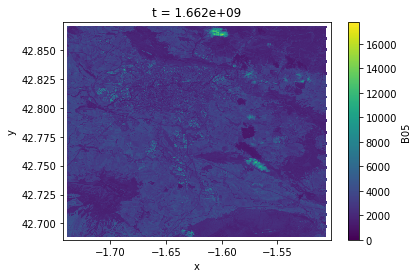

In [4]:
datacube.get(band).isel(t=0).plot(x="x", y="y", vmin=0, vmax=vmax)
plt.savefig("0.png")
plt.show();

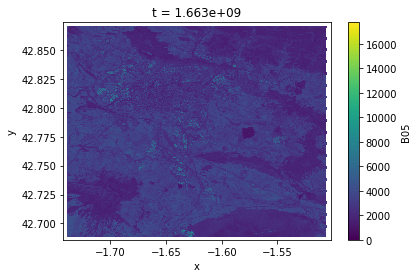

In [5]:
datacube.get(band).isel(t=1).plot(x="x", y="y", vmin=0, vmax=vmax)
plt.savefig("1.png")
plt.show();

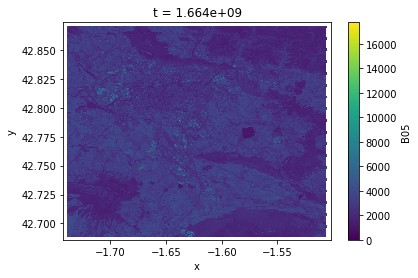

In [6]:
datacube.get(band).isel(t=2).plot(x="x", y="y", vmin=0, vmax=vmax)
plt.savefig("2.png")
plt.show();

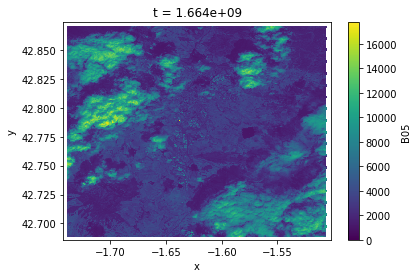

In [7]:
datacube.get(band).isel(t=3).plot(x="x", y="y", vmin=0, vmax=vmax)
plt.savefig("3.png")
plt.show();

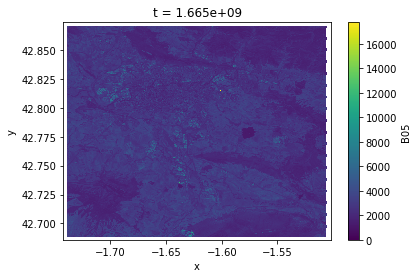

In [8]:
datacube.get(band).isel(t=4).plot(x="x", y="y", vmin=0, vmax=vmax)
plt.savefig("4.png")
plt.show();

## Timings of different queries

### Get a temporal slice of a band

In [9]:
%%timeit
datacube.get(band).isel(t=0).compute()

8.22 ms ± 577 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Extract a ROI from the datacube

In [10]:
%%timeit
datacube.where(datacube.x < -1.6, drop=True) \
        .where(datacube.y >= 42.75, drop=True) \
        .compute()

41 ms ± 3.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


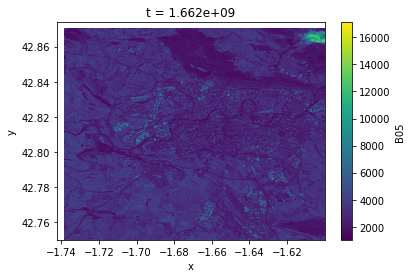

In [11]:
datacube.where(datacube.x < -1.6, drop=True) \
        .where(datacube.y >= 42.75, drop=True) \
        .get(band).isel(t=0).plot(x="x", y="y")

## Analytics available

### Metrics

In [12]:
%%timeit
datacube.mean(dim=["x", "y"]).compute()

36.5 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Histogram of a band

In [13]:
%%timeit
no_nan = np.ravel(datacube.get(band).to_numpy())
no_nan = no_nan[pd.notnull(no_nan)]
np.histogram(no_nan, bins=50)

84.6 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
no_nan = np.ravel(datacube.get(band).isel(t=0).to_numpy())
no_nan = no_nan[pd.notnull(no_nan)]
counts0, bins = np.histogram(no_nan, bins=50)

In [15]:
no_nan = np.ravel(datacube.get(band).isel(t=1).to_numpy())
no_nan = no_nan[pd.notnull(no_nan)]
counts1, bins = np.histogram(no_nan, bins=50)

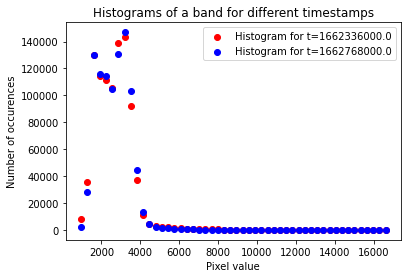

In [16]:
plt.scatter(bins[:-1], counts0, c="r", label=f"Histogram for t={datacube.t.values[0]}")
plt.scatter(bins[:-1], counts1, c="b", label=f"Histogram for t={datacube.t.values[1]}")
plt.xlabel("Pixel value")
plt.ylabel("Number of occurences")
plt.title("Histograms of a band for different timestamps")
plt.legend()
plt.show();

### Histogram of a pixel

In [17]:
%%timeit
datacube.get(band).isel(x=100, y=50).values

8.41 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


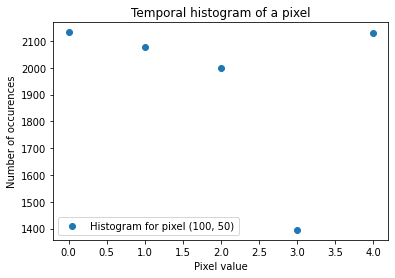

In [18]:
pixelValues = datacube.get(band).isel(x=100, y=50).values
plt.scatter(np.arange(len(pixelValues)), pixelValues, label="Histogram for pixel (100, 50)")
plt.xlabel("Pixel value")
plt.ylabel("Number of occurences")
plt.title("Temporal histogram of a pixel")
plt.legend()
plt.show();